In [1]:
import matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
from shapely.geometry import Point


plt.rcParams["figure.figsize"] = (10, 5)

saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

filepath = "cafes-and-restaurants-with-seating-capacity.csv"
seats_data = pd.read_csv(filepath)

seats_data.sample(5)


,Census_year,Block_ID,Property_ID,Base_property_ID,Building_address,CLUE_small_area,Trading_name,Business_address,Industry_code,Industry_description,Seating_type,Number_seats,Longitude,Latitude,location
40112,2011,24,102092,102092,359-373 Collins Street MELBOURNE 3000,Melbourne (CBD),Headquarters,"Part Ground , 367 Collins Street MELBOURNE 3000",4511,Cafes and Restaurants,Seats - Indoor,16,144.962443,-37.817282,"-37.8172818457933, 144.96244246265"
18136,2016,65,105698,105698,269-321 Lonsdale Street MELBOURNE 3000,Melbourne (CBD),Jones the Grocer,"Shop 308, 287 Lonsdale Street MELBOURNE 3000",4511,Cafes and Restaurants,Seats - Indoor,140,144.963663,-37.812485,"-37.81248469932898, 144.9636627970858"
55318,2008,72,105375,105375,276-282 King Street MELBOURNE 3000,Melbourne (CBD),Sakae,"Shop 1, 280-282 King Street MELBOURNE 3000",4511,Cafes and Restaurants,Seats - Outdoor,12,144.954824,-37.813499,"-37.81349891105, 144.95482420064457"
24221,2019,267,106252,106252,56-62 Lygon Street CARLTON 3053,Carlton,Artee Cafe,"Part Ground , 62 Lygon Street CARLTON 3053",4511,Cafes and Restaurants,Seats - Outdoor,7,144.966442,-37.805670,"-37.805669595249995, 144.9664417701175"
32421,2009,243,105654,105654,22-40 Lincoln Square North CARLTON 3053,Carlton,Bouverie Deli,154 Lincoln Square North CARLTON 3053,4511,Cafes and Restaurants,Seats - Indoor,8,144.962731,-37.801336,"-37.8013360804, 144.96273111475813"


In [2]:
mel_prop = gpd.read_file("property-boundaries/property-boundaries.shp")
mel_muni = gpd.read_file("municipal-boundary/municipal-boundary.shp")


In [3]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import geopandas as gp

%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# 定義文件路徑
file_path = r'C:\Users\chiay\1161\cafes_data\GDA2020\vic_localities.shp'

# 使用 geopandas 讀取 Shapefile
burbs = gp.read_file(file_path)


burbs.set_crs(epsg=5234, inplace=True, allow_override=True) 
# https://epsg.io/8021
# GDA2020 is the latest and least wrong coord set for Sydney
burbs.sample(2)



,LC_PLY_PID,LOC_PID,DT_CREATE,LOC_NAME,LOC_CLASS,STATE,geometry
133,lcp26dc58d87729,loc4fbbfa844d68,2021-06-24,Bannerton,Gazetted Locality,VIC,"POLYGON ((142.697 -34.755, 142.697 -34.754, 14..."
2194,lcpkyBCT3U6uUwv,locde7f91aff148,2023-06-26,Ringwood North,Gazetted Locality,VIC,"POLYGON ((145.214 -37.811, 145.214 -37.811, 14..."


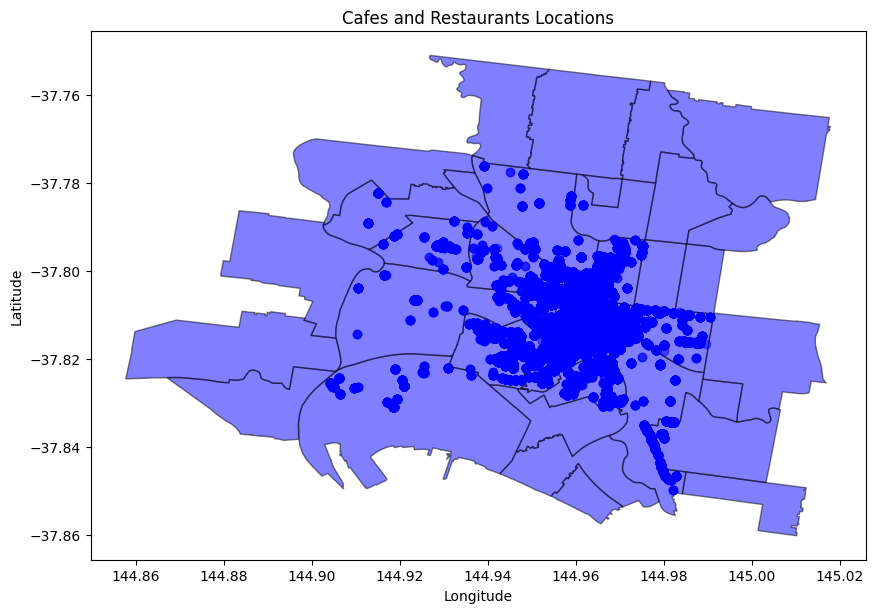

In [3]:
min_longitude = 144.9041689
max_longitude = 144.99057
min_latitude = -37.84971896
max_latitude = -37.77619476

# Filter the geometries based on the longitude and latitude ranges
filtered_burbs = burbs.cx[min_longitude:max_longitude, min_latitude:max_latitude]

# Plot the filtered geometries
fig, ax = plt.subplots(figsize=(10, 10))
filtered_burbs.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)

# Set plot labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Filtered Geometries within Specified Longitude and Latitude Ranges')


# Plot the location data
plt.scatter(seats_data['Longitude'], seats_data['Latitude'], c='blue', marker='o', alpha=0.5)

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cafes and Restaurants Locations')

# Show the plot
plt.show()

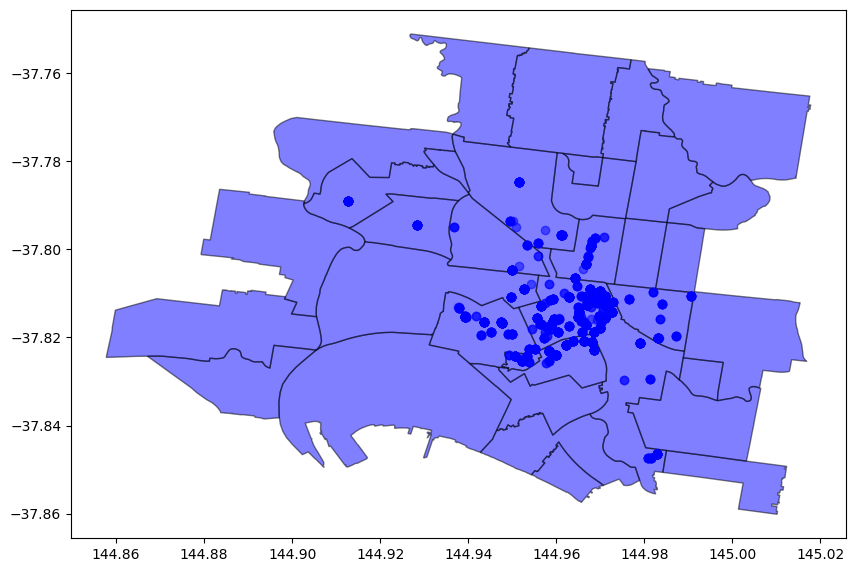

In [4]:
seats_200 = seats_data[seats_data.Number_seats >200]


# Plot the filtered geometries
fig, ax = plt.subplots(figsize=(10, 10))
filtered_burbs.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)


# Plot the location data
plt.scatter(seats_200['Longitude'], seats_200['Latitude'], c='blue', marker='o', alpha=0.5)


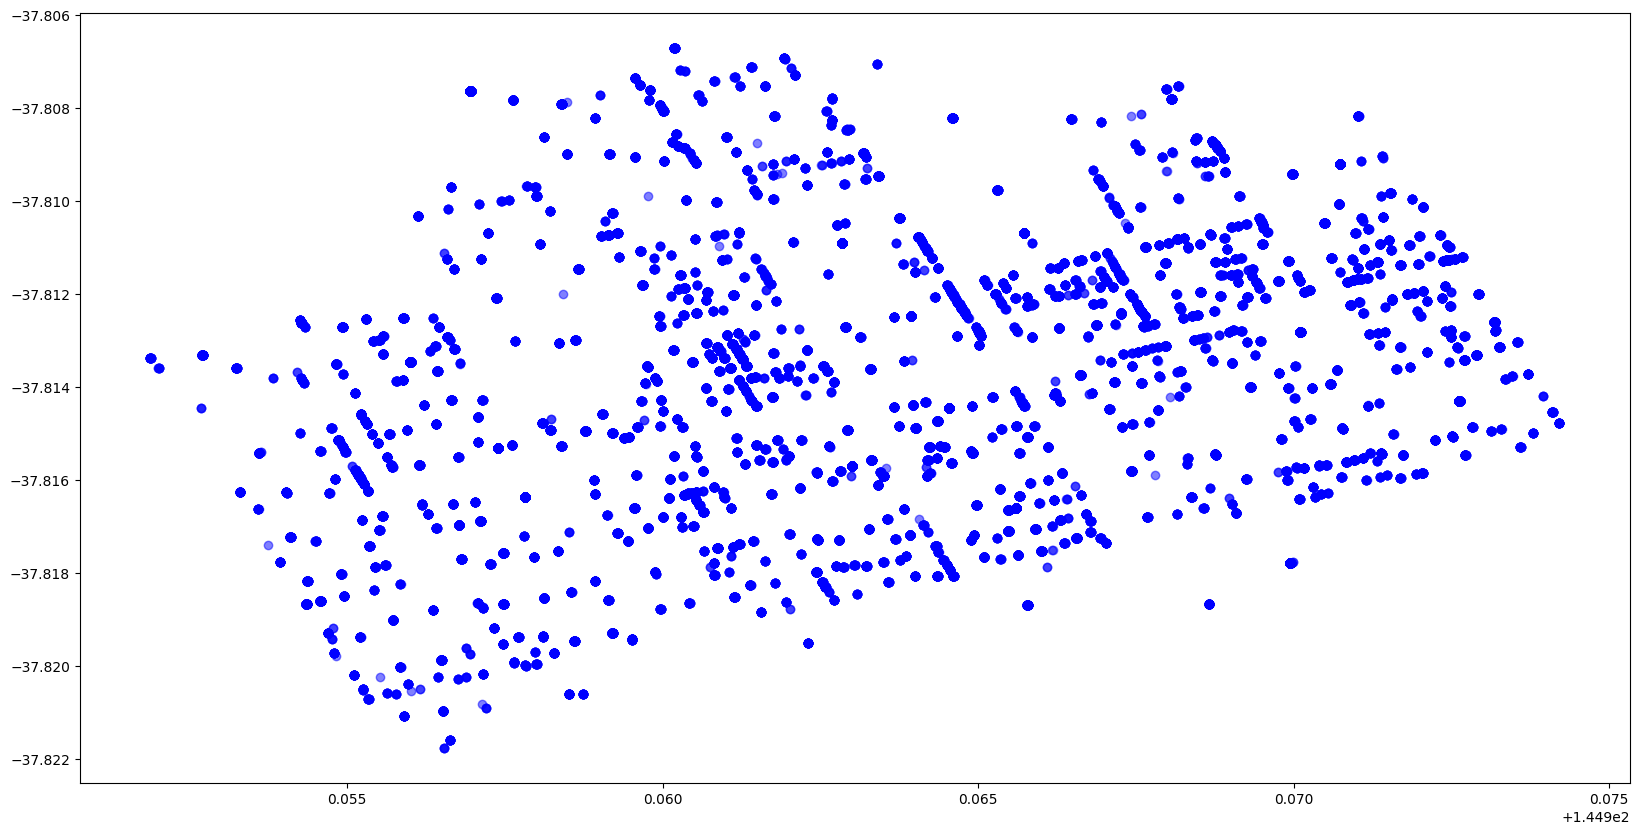

In [5]:
seats_club = seats_data[seats_data.CLUE_small_area == 'Melbourne (CBD)']

# Plot the location data
plt.scatter(seats_club['Longitude'], seats_club['Latitude'], c='blue', marker='o', alpha=0.5)



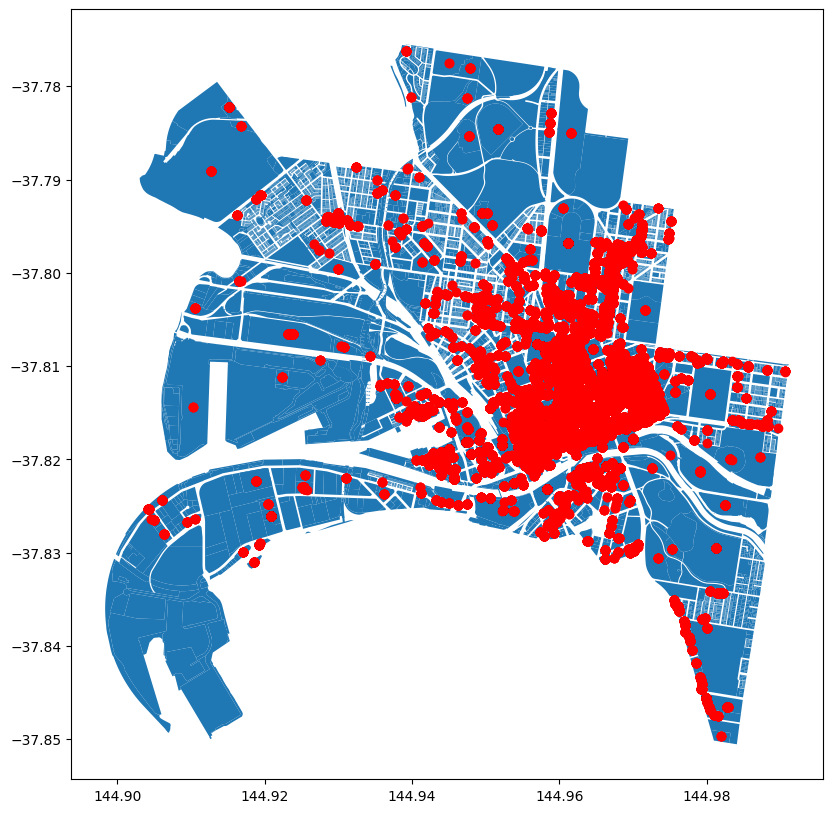

In [7]:

def plot_mel_sca(seats_data):
    mel_prop.plot()
    plt.scatter(seats_data['Longitude'], seats_data['Latitude'], c='red', marker='o', alpha=1)


plot_mel_sca(seats_data)



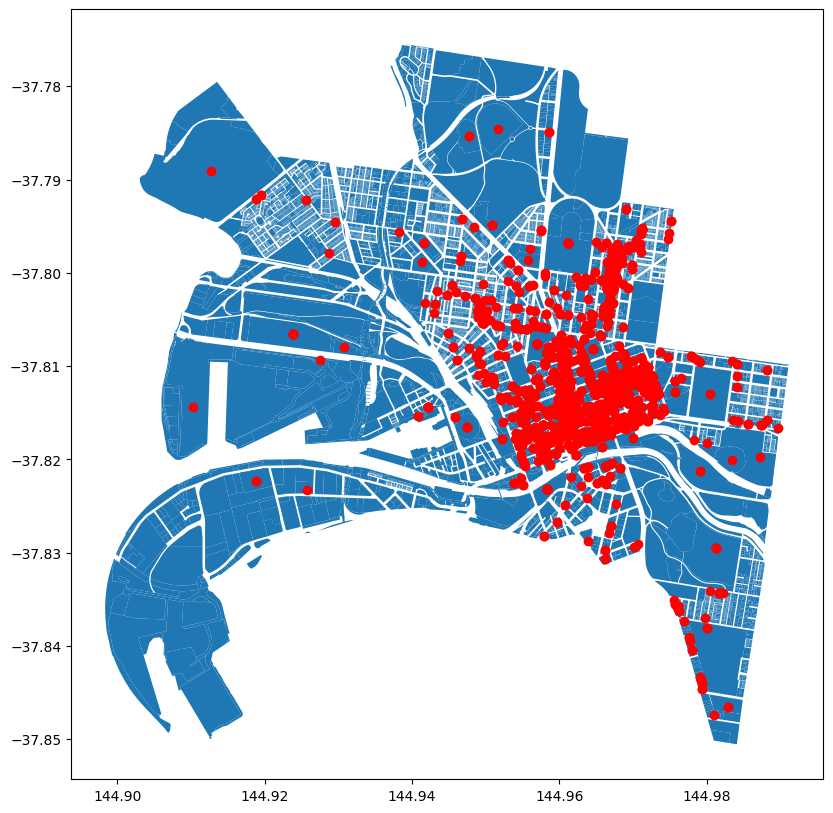

In [17]:
seats_200 = seats_data[seats_data.Census_year == 2002]

plot_mel_sca(seats_200)

In [12]:
seats_data.Building_address == "183-265 La Trobe Street MELBOURNE 3000 "

0        False
1        False
2        False
3        False
4        False
         ...  
60050    False
60051    False
60052    False
60053    False
60054    False
Name: Building_address, Length: 60055, dtype: bool